# Memory Requirements
- Feasible grid size is severely limited by memory requirements

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [20]:
def sizeof_fmt(num, suffix='B'):
    """Human-readable bytes: https://stackoverflow.com/questions/1094841/reusable-library-to-get-human-readable-version-of-file-size"""
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

In [44]:
def apply_to_array(fun, arr):
    vals = np.array([fun(x) for x in arr.flatten()])
    return vals.reshape(arr.shape)

In [22]:
def calc_size(ns, na):
    nx = ns
    ny = ns
    nz = ns
    ntheta = na
    nphi = na
    
    nnz = nx * ny * ntheta * nphi * ( (nz-1) * (6 + ntheta * nphi) + 1)
    
    return 8*nnz

## Now, we take only a 5x5 square with 2-adjacent angles

In [79]:
def calc_size_mod(ns, na):
    nx = ns
    ny = ns
    nz = ns
    ntheta = na
    nphi = na
    
    nnz = nx * ny * ntheta * nphi * ( (nz-1) * (6 + 25) + 1)
    
    return 8*nnz

In [80]:
ns_vals = np.arange(8,26,2)
na_vals = np.arange(8,26,2)

In [81]:
ns, na = np.meshgrid(ns_vals, na_vals, indexing='ij')

In [82]:
sizes = calc_size(ns, na)
human_readable = pd.DataFrame(apply_to_array(sizeof_fmt, sizes), columns=na_vals, index=ns_vals)
human_readable

,8,10,12,14,16,18,20,22,24
8,15.3 MiB,36.3 MiB,73.9 MiB,135.4 MiB,229.4 MiB,365.6 MiB,555.3 MiB,810.8 MiB,1.1 GiB
10,30.8 MiB,72.9 MiB,148.4 MiB,272.0 MiB,460.7 MiB,734.4 MiB,1.1 GiB,1.6 GiB,2.2 GiB
12,54.2 MiB,128.2 MiB,261.2 MiB,478.7 MiB,810.8 MiB,1.3 GiB,1.9 GiB,2.8 GiB,4.0 GiB
14,87.2 MiB,206.2 MiB,420.1 MiB,769.9 MiB,1.3 GiB,2.0 GiB,3.1 GiB,4.5 GiB,6.4 GiB
16,131.4 MiB,310.7 MiB,633.1 MiB,1.1 GiB,1.9 GiB,3.1 GiB,4.6 GiB,6.8 GiB,9.6 GiB
18,188.4 MiB,445.7 MiB,908.0 MiB,1.6 GiB,2.8 GiB,4.4 GiB,6.7 GiB,9.7 GiB,13.8 GiB
20,260.0 MiB,614.9 MiB,1.2 GiB,2.2 GiB,3.8 GiB,6.1 GiB,9.2 GiB,13.4 GiB,19.0 GiB
22,347.6 MiB,822.3 MiB,1.6 GiB,3.0 GiB,5.1 GiB,8.1 GiB,12.3 GiB,18.0 GiB,25.4 GiB
24,453.1 MiB,1.0 GiB,2.1 GiB,3.9 GiB,6.6 GiB,10.6 GiB,16.0 GiB,23.4 GiB,33.1 GiB


In [83]:
sizes_mod = calc_size_mod(ns, na)
human_readable_mod = pd.DataFrame(apply_to_array(sizeof_fmt, sizes_mod), columns=na_vals, index=ns_vals)
human_readable_mod

,8,10,12,14,16,18,20,22,24
8,6.8 MiB,10.6 MiB,15.3 MiB,20.9 MiB,27.2 MiB,34.5 MiB,42.6 MiB,51.5 MiB,61.3 MiB
10,13.7 MiB,21.4 MiB,30.8 MiB,41.9 MiB,54.7 MiB,69.2 MiB,85.4 MiB,103.4 MiB,123.0 MiB
12,24.0 MiB,37.6 MiB,54.1 MiB,73.6 MiB,96.2 MiB,121.7 MiB,150.3 MiB,181.9 MiB,216.4 MiB
14,38.7 MiB,60.4 MiB,87.0 MiB,118.4 MiB,154.7 MiB,195.7 MiB,241.7 MiB,292.4 MiB,348.0 MiB
16,58.2 MiB,91.0 MiB,131.1 MiB,178.4 MiB,233.0 MiB,294.9 MiB,364.1 MiB,440.5 MiB,524.2 MiB
18,83.5 MiB,130.5 MiB,187.9 MiB,255.8 MiB,334.1 MiB,422.9 MiB,522.1 MiB,631.7 MiB,751.8 MiB
20,115.2 MiB,180.1 MiB,259.3 MiB,352.9 MiB,460.9 MiB,583.4 MiB,720.2 MiB,871.5 MiB,1.0 GiB
22,154.1 MiB,240.8 MiB,346.7 MiB,471.9 MiB,616.3 MiB,780.1 MiB,963.0 MiB,1.1 GiB,1.4 GiB
24,200.8 MiB,313.8 MiB,451.8 MiB,615.0 MiB,803.2 MiB,1016.6 MiB,1.2 GiB,1.5 GiB,1.8 GiB


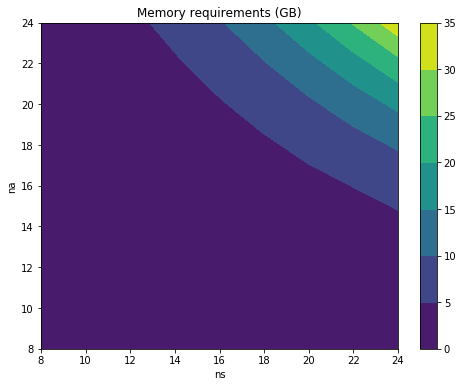

In [78]:
plt.figure(figsize=[8,6])
plt.contourf(ns, na, sizes/2**30)
plt.xlabel('ns')
plt.ylabel('na')
plt.colorbar()
plt.title('Memory requirements (GB)')